##비지도 학습

비지도 학습은 Clustering, 차원압축, 이상감지 등이 있음.

###clustering

클래스 정보 없이, 입력데이터가 비슷한 것끼리 클래스를 나누는 것

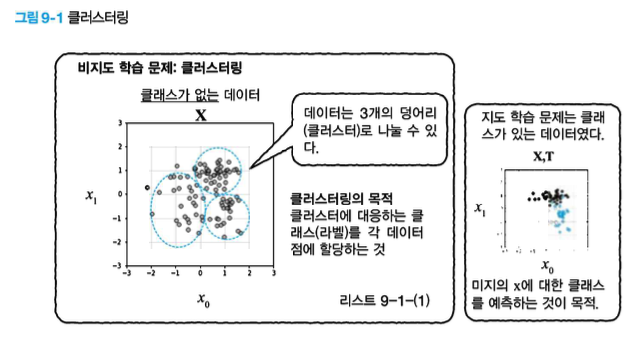



In [ ]:
#kmenas 기법으로 clustering 구현

import numpy as np
import matplotlib.pyplot as plt

#data 생성
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) #분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) #분포의 분산
Pi = np.array([0.4, 0.8, 1]) #누적확률
for n in range(N):
  wk =  np.random.rand()
  for k in range(K):
    if wk < Pi[k]:
      T3[n, k] = 1
      break
  for k in range(2):
    X[n, k] = np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k]

In [ ]:
#데이터 그리기
def show_data(x):
  plt.plot(x[:, 0], x[:, 1], linestyle='none',
           marker='o', markersize=6,
           markeredgecolor='black', color='gray', alpha=0.8)
  plt.grid(True)

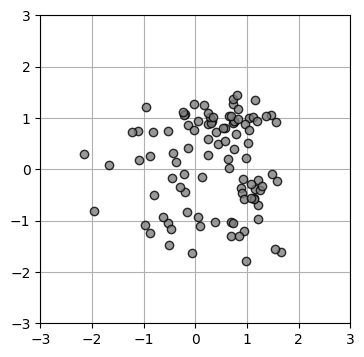

In [ ]:
plt.figure(1, figsize=(4, 4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X=X, X_range0=X_range0,
         X_range1=X_range1)

###K-means

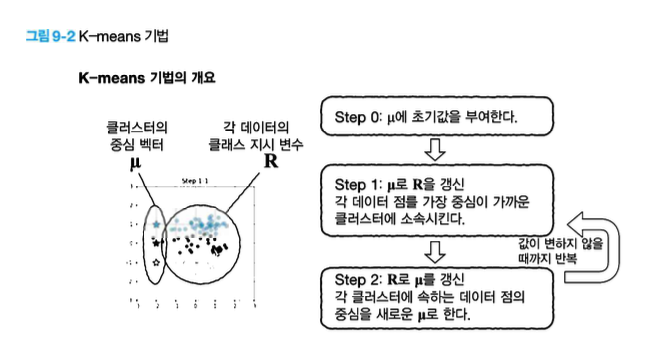

가우시안 혼합 모델의 경우 미리 분할할 클러스터의 개수 K를 정해야 한다.

중심벡터 : u -> 클러스터의 중심 위치

지시변수 : R -> 각 데이터가 어떤 클러스터에 속하는지

- step0 : 클러스터의 중심벡터 u에 적절한 값 제공
- step1 : u를 바탕으로 지시변수 R을 결정
- step2 : 현시점에서 지시변수 R로 u를 갱신
- step3 : step1과 step2의 단계를 반복하여 u, R을 갱신
- 양자의 값이 변화하지 않으면 종료!

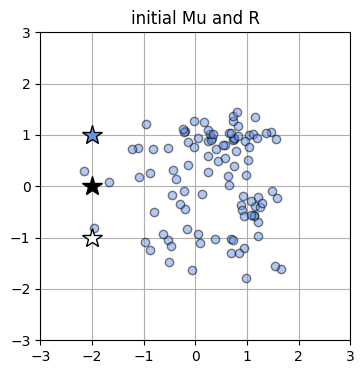

In [ ]:
#Mu 및 R 초기화 step0
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]

#데이터를 그리는 함수
def show_prm(x, r, mu, col):
  for k in range(K):
    #데이터 분포의 묘사
    plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1],
             marker='o',
             markerfacecolor=X_col[k], markeredgecolor='k',
             markersize=6, alpha=0.5, linestyle='none')
    #데이터의 평균을 '별표'로 묘사
    plt.plot(mu[k, 0], mu[k, 1], marker='*',
             markerfacecolor=X_col[k], markersize=15,
             markeredgecolor='k', markeredgewidth=1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

plt.figure(figsize=(4, 4))
R = np.c_[np.ones((N, 1)), np.zeros((N, 2))]

show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()

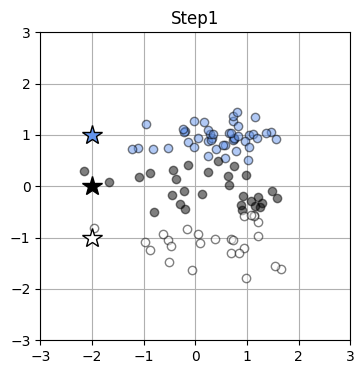

In [ ]:
#R의 갱신 -> 각 데이터의 점을 가장 중심이 가까운 클러스터에 넣는 방식
#R을 정하기 : Step1

def step1_kmeans(x0, x1, mu):
  N = len(x0)
  r = np.zeros((N, K))
  for n in range(N):
    wk = np.zeros(K)
    for k in range(K):
      wk[k] = (x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2
    r[n, np.argmin(wk)] = 1
  return r

plt.figure(figsize=(4, 4))
R = step1_kmeans(X[:, 0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt.title('Step1')
plt.show()



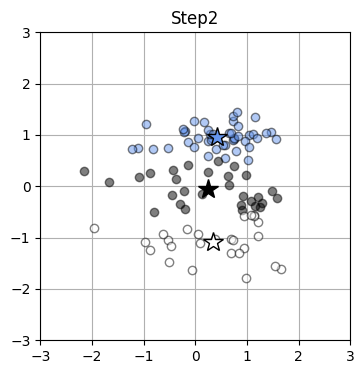

In [ ]:
#u를 갱신 -> 각 클러스터에 속하는 데이터 점의 중심을 새로운 u로 함.
#Mu 결정 : step2

def step2_kmeans(x0, x1, r):
  mu = np.zeros((K, 2))
  for k in range(K):
    mu[k, 0] = np.sum(r[:, k] * x0) / np.sum(r[:, k])
    mu[k, 1] = np.sum(r[:, k] * x1) / np.sum(r[:, k])
  return mu

plt.figure(figsize=(4, 4))
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step2')
plt.show()

u가 각각 분포의 중심으로 이동함.

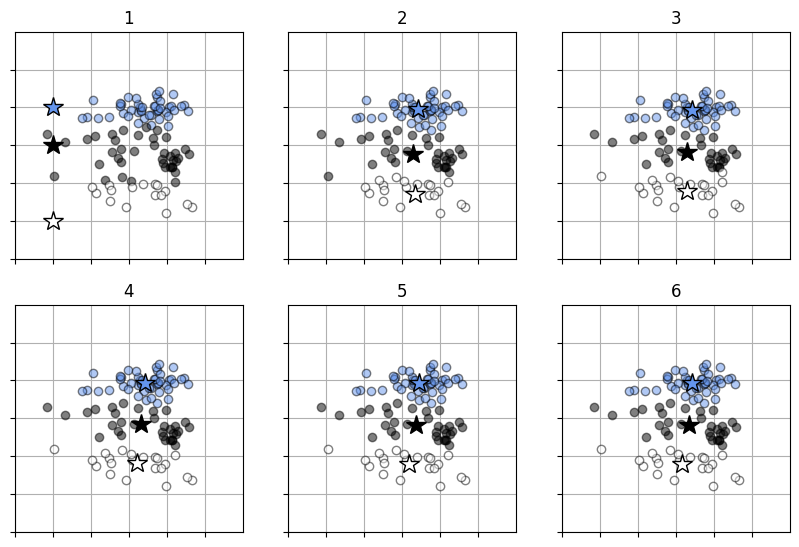

In [ ]:
plt.figure(1, figsize=(10, 6.5))
Mu = np.array([[-2, 1], [-2, 0], [-2, -2]])
max_it = 6
for it in range(0, max_it):
  plt.subplot(2, 3, it + 1)
  R = step1_kmeans(X[:, 0], X[:, 1], Mu)
  show_prm(X, R, Mu, X_col)
  plt.title("{0:d}".format(it + 1))
  plt.xticks(range(X_range0[0], X_range0[1]), "")
  plt.yticks(range(X_range1[0], X_range1[1]), "")
  Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

서서히 u가 3개의 클러스터의 중심으로 이동하고, 각 클러스터마다 다른 라벨이 할당된 것을 알 수 있다.

### 왜곡 척도



In [ ]:
def distortion_measure(x0, x1, r, mu):
  N = len(x0)
  J = 0
  for n in range(N):
    for k in range(K):
      J = J + r[n, k] * ((x0[n] - mu[k, 0])**2
                         + (x1[n] - mu[k, 1])**2)
  return J
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
distortion_measure(X[:, 0], X[:, 1], R, Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


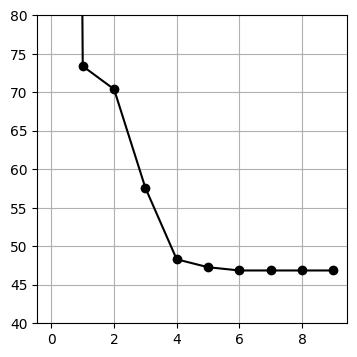

In [ ]:
#Mu와 R의 초기화
N = X.shape[0]
K = 3
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it) #왜곡 척도의 계산 결과를 넣음
for it in range(0, max_it): #k-means 기법
  R = step1_kmeans(X[:, 0], X[:, 1], Mu)
  DM[it] = distortion_measure(X[:, 0], X[:, 1], R, Mu) #왜곡척도
  Mu = step2_kmeans(X[:, 0], X[:, 1], R)
print(np.round(DM, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(DM, color='black', linestyle='-', marker='o')
plt.ylim(40, 80)
plt.grid(True)
plt.show()

step이 진행할수록 왜곡 척도는 점차 감소하고, step 6에서 값이 46.86에서 멈춘다.

-> 이는 u와 R이 값이 변화하지 않는 다는 것을 의미


k-means에서는 u에 무엇을 할당하는지에 따라 결과가 달라지는 초기값 의존성이 존재한다.

## 가우시안 혼합 모델
### 확률적 클러스터링
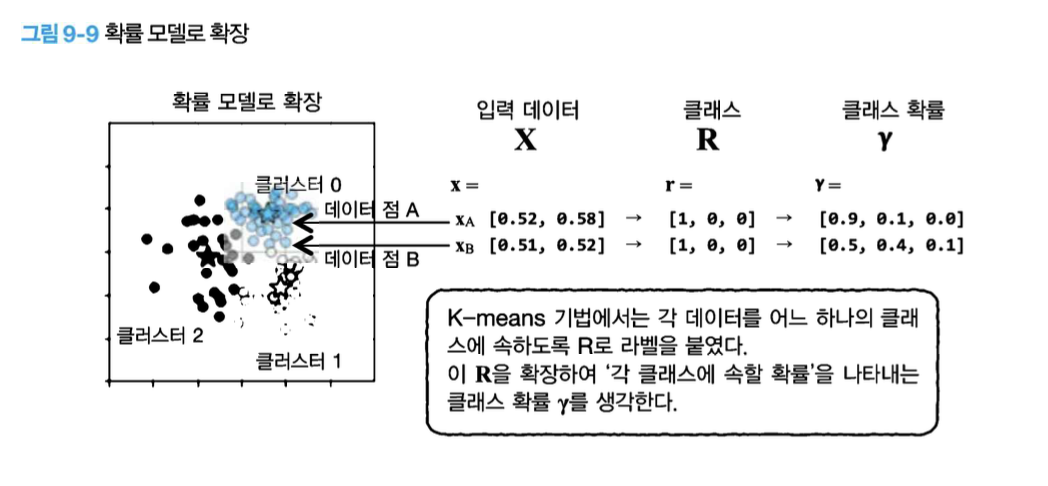



In [ ]:
import numpy as np
wk = np.load('data_ch9.npz')
X = wk['X']
X_range0 = wk['X_range0']
X_range1 = wk['X_range1']

In [ ]:
#가우스 함수
def gauss(x, mu, sigma): #mu : 길이 D인 중심벡터, sigma: 공분산행렬
  N, D = x.shape
  c1 = 1 / (2 * np.pi) ** (D / 2)
  c2 = 1 / (np.linalg.det(sigma)** (1/2))
  inv_sigma = np.linalg.inv(sigma)
  c3 = x - mu
  c4 = np.dot(c3, inv_sigma)
  c5 = np.zeros(N)
  for d in range(D):
    c5 = c5 + c4[:, d] * c3[:, d]
  p = c1 * c2 * np.exp(-c5 / 2)
  return p

In [ ]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


In [ ]:
#가우시안 혼합모델 (가우시안 함수 여러번 더하기)
def mixgauss(x, pi, mu, sigma):
  N, D = x.shape
  K = len(pi)
  p = np.zeros(N)
  for k in range(K):
    p = p + pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
  return p

In [ ]:
x = np.array([[1, 2], [2, 2], [3, 4]])
pi = np.array([0.3, 0.7])
mu = np.array([[1, 1], [2, 2]])
sigma = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 1]]])
print(mixgauss(x, pi, mu, sigma))

[0.09031182 0.09634263 0.00837489]


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import art3d

#혼합 가우스 등고선표시
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xn*xn, 1)), np.reshape(xx1, (xn*xn, 1))]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    plt.contour(x0, x1, f, 10, colors='gray')

def show3d_mixgauss(ax, pu, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xn*xn, 1)), np.reshape(xx1, (xn*xn, 1))]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')

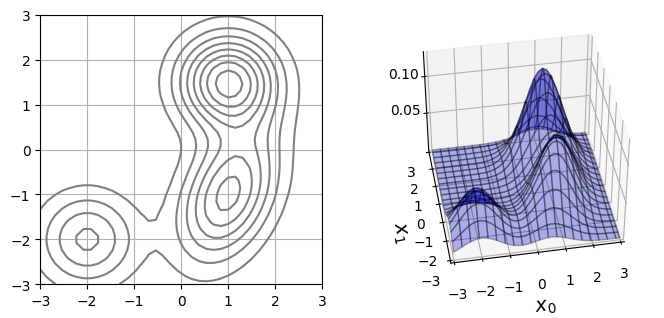

In [ ]:
#test

pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array(
    [[[.5, 0], [0, .5]], [[1, 0.25], [0.25, .5]], [[.5, 0], [0, .5]]])

Fig = plt.figure(1, figsize=(8, 3.5))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)

Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()



### EM 알고리즘 개요

EM : 알고리즘 기댓값 최대화 알고리즘

관측되지 않는 잠재변수에 의존하는 확률 모델에서 최대 가능도나 최대사후확률을 갖는 모수의 추정값을 찾는 반복 알고리즘

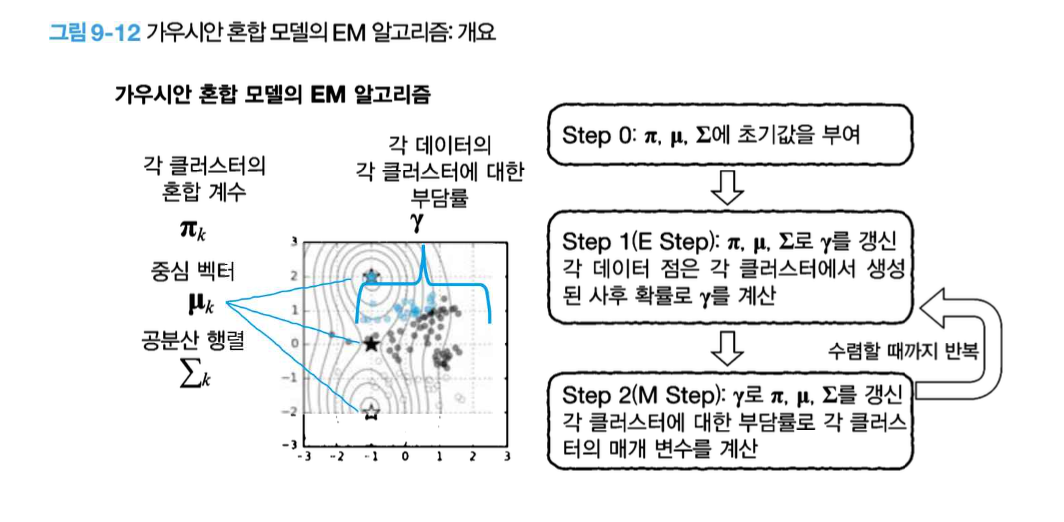

- step0 : pi, mu, sigma 초기화
- step1 : 현시점의 pi, mu, sigma를 사용하여 부담률 구하기
- step2 : 현시점의 부담률을 이용하여 pi, mu, sigma 구하기

### step0 : 변수의 준비 및 초기화

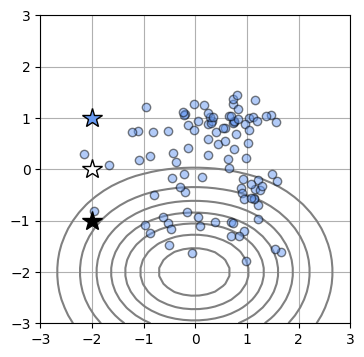

In [ ]:
# 초기 설정
N = X.shape[0]
K = 3
Pi = np.array([0.33, 0.33, 0.34])
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]

X_col = np.array([[0.4, 0.6, 0.95], [1, 1, 1], [0, 0, 0]])


# 데이터를 그리기
def show_mixgauss_prm(x, gamma, pi, mu, sigma):
    N, D = x.shape
    show_contour_mixgauss(pi, mu, sigma)
    for n in range(N):
        col = gamma[n, 0]*X_col[0] + gamma[n, 1]*X_col[1] + gamma[n, 2]*X_col[2]
        plt.plot(x[n, 0], x[n, 1], 'o',
                 color=tuple(col), markeredgecolor='black',
                 markersize=6, alpha=0.5)
    for k in range(K):
        plt.plot(mu[k, 0], mu[k, 1], marker='*',
                 markerfacecolor=tuple(X_col[k]), markersize=15,
                 markeredgecolor='k', markeredgewidth=1)

    plt.grid(True)

plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

### Step 1(EStep): γ갱신


-> 가우스 함수의 값이 높을수록 부담률도 높아진다는 갱신방법

In [ ]:
# gamma 갱신 (E Step)
def e_step_mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) # K*N
    gamma = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = pi[k] * y[n, k]
        gamma[n, :] = wk / np.sum(wk)
    return gamma


# 메인
Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)

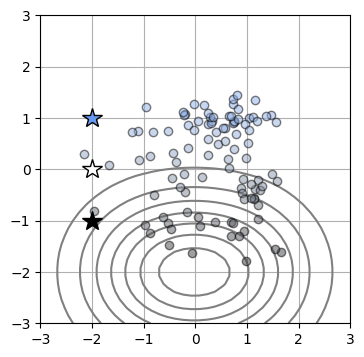

In [ ]:
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

### Step 2(M Step): π, μ, Σ의 갱신

In [ ]:
# Pi, Mu, Sigma 갱신 (M step)
def m_step_mixgauss(x, gamma):
    N, D = x.shape
    N, K = gamma.shape
    # pi를 계산
    pi = np.sum(gamma, axis=0) / N
    # mu을 계산
    mu = np.zeros((K, D))
    for k in range(K):
        for d in range(D):
            mu[k, d] = np.dot(gamma[:, k], x[:, d]) / np.sum(gamma[:, k])
    # sigma를 계산
    sigma = np.zeros((K, D, D))
    for k in range(K):
        for n in range(N):
            wk = x - mu[k, :]
            wk = wk[n, :, np.newaxis]
            sigma[k, :, :] = sigma[k, :, :] + gamma[n, k] * np.dot(wk, wk.T)
        sigma[k, :, :] = sigma[k, :, :] / np.sum(gamma[:, k])
    return pi, mu, sigma


# 메인
Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)

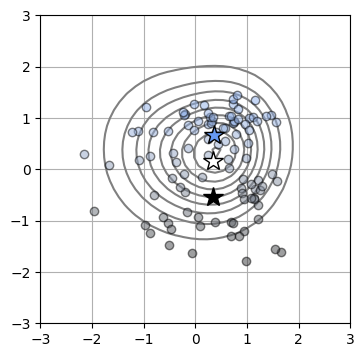

In [ ]:
# 표시
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

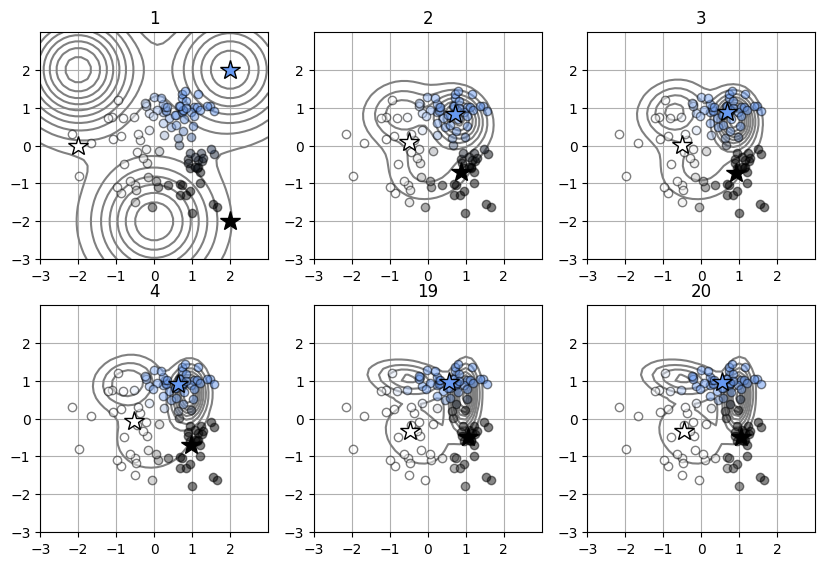

In [ ]:
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
plt.figure(1, figsize=(10, 6.5))
max_it = 20 # 반복 횟수

i_subplot = 1;
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
    if it<4 or it>17:
        plt.subplot(2, 3, i_subplot)
        show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
        plt.title('{0:d}'.format(it+1))
        plt.xticks(range(X_range0[0], X_range0[1]))
        plt.yticks(range(X_range1[0], X_range1[1]))
        i_subplot = i_subplot+1
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)
plt.show()

kmans기법과는 달리, 각 데이터의 클러스터에 소속이 부담률이라는 확률로 표현되고 있음.

kmeans 기법과 마찬가지로, 매개 변수의 초기값에 따라 클러스터링 결과가 달라지고 있음.

kmeans에서는 왜곡 척도 사용, 가우시안 혼합모델에서는 가능도를 사용.

## 가능도

In [ ]:
# 혼합 가우스의 목적 함수
def nlh_mixgauss(x, pi, mu, sigma):
    # x: N*D
    # pi: K*1
    # mu: K*D
    # sigma: K*D*D
    # output 1h: N*K
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) # K*N
    lh = 0
    for n in range(N):
        wk = 0
        for k in range(K):
            wk = wk + pi[k] * y[n, k]
        lh = lh + np.log(wk)
    return -lh

[426.22 229.86 224.32 220.8  218.63 216.93 215.93 215.51 215.33 215.24
 215.18 215.15 215.13 215.11 215.1  215.1  215.09 215.09 215.08 215.08]


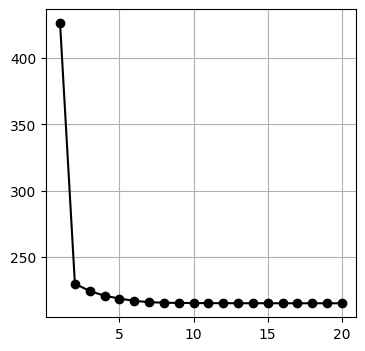

In [ ]:
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]


max_it = 20
it = 0
Err = np.zeros(max_it) # distortion measure
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
    Err[it] = nlh_mixgauss(X, Pi, Mu, Sigma)
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)


print(np.round(Err, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(np.arange(max_it) + 1,
         Err, color='k', linestyle='-', marker='o')
# plt.ylim([40, 80])
plt.grid(True)
plt.show()

음의 로그 가능도는 점차 감소해 step10 정도에서 대부분 수렴함.

다양한 초기값으로 클러스터링을 시도하면 그 중 가장 좋은 결과는 음의 가능도가 가장 작다.

After

kmeans 에서 초기값을 어떻게 지정하냐!
-> 임의의 값으로 지정하되 초기값 의존성이 존재하므로 왜곡척도가 가장 낮은 값들로 초기값을 지정한다.

왜곡 척도는 데이터 점부터 소속하는 클러스터 중심까지의 제곱 거리의 합.
-> 학습이 진행됨에 따라 감소하는 목적함수로 쓰일 수 있음.